###Analisi del dataset in formato tuple

In [ ]:
import pandas as pd

# Specifica il percorso del file Excel
file_path = '/content/FakeCTI.xlsx'

# Legge il file Excel e lo converte in un DataFrame
df = pd.read_excel(file_path)
#Riordinamento random del dataset con seed 42
df = df.sample(frac=1, random_state=42)


Conteggio di articoli per ogni campagna

In [ ]:
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print(conteggio_articoli_per_campagna)

print(f"Totale articoli:", conteggio_articoli_per_campagna.sum())

CAMPAGNA
 Covid vaccines cause autism                                       4
2016 US presidential elections                                    11
5 meter tall human                                                 1
A Cure for Wellnes Promotion                                       5
Alabama Power Positive Reputation                                  3
American Action News                                             103
Cannabis cure for cancer                                           1
Climate Change Denial                                             29
Clone Zone                                                         3
Coronavirus and vaccines in America                                8
Counter criticism of Turkey in foreign media                       2
Covid trigger Neurological Degenerative Diseases                   8
Covid vaccines cospiration theories                                3
Covid vaccines increase deaths                                     3
Disinformation on armed f

Estrazione di sole 3 campagne scelte random

In [ ]:
# Definisci la lista delle tre campagne da selezionare
campagne_selezionate = ['American Action News', 'Doctors found dead after cancer discovery', 'Vaccines and illnesses fake news']

# Filtra il dataframe originale per includere solo le righe delle campagne selezionate
df_campagne_selezionate = df[df['CAMPAGNA'].isin(campagne_selezionate)]

# Visualizza il nuovo dataframe
print(df_campagne_selezionate)


                                                  TUPLA  ID ARTICOLO  \
8447  the U.S. government - is subsidizing - the obe...        12126   
8746  Studies on cannabis for cancer treatment - exi...        12139   
8660                         The fact - is - remarkable        12133   
1076  Donald Trump - is not the subject of - (Ryan, ...           74   
4279  The Department of Public Safety - believes - D...        11842   
...                                                 ...          ...   
1899  the fire - crept - upward into Sharpton’s head...          175   
8666  This study - suggested - that while there may ...        12133   
1184  Great America PAC - needs you to - take part i...           87   
1685  Daily Beast's Olivia Nuzzi - noted - during Bo...          152   
4426  Patients - have - emailed and posted comments ...        11855   

                                       CAMPAGNA  
8447           Vaccines and illnesses fake news  
8746           Vaccines and illness

### PRE-PROCESSING E SEPARAZIONE
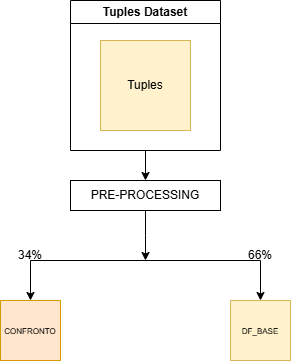

In [ ]:
# Funzione per suddividere in base alla percentuale
def suddividi_gruppo(gruppo, perc=0.66):
    # Seleziona articoli unici per il gruppo
    articoli_unici = gruppo['ID ARTICOLO'].unique()
    # Mescola gli articoli unici
    #np.random.shuffle(articoli_unici)
    # Calcola quanti articoli dovrebbero andare in BASE
    limite = int(len(articoli_unici) * perc)
    articoli_base = articoli_unici[:limite]
    articoli_confronto = articoli_unici[limite:]

    # Crea i DataFrame BASE e CONFRONTO per il gruppo corrente
    base = gruppo[gruppo['ID ARTICOLO'].isin(articoli_base)]
    confronto = gruppo[gruppo['ID ARTICOLO'].isin(articoli_confronto)]

    return base, confronto

In [ ]:
import numpy as np

# Filtra le campagne con più di 3 articoli
campagne_eligible = df_campagne_selezionate.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()
campagne_eligible = campagne_eligible[campagne_eligible > 3].index

# Crea un DataFrame filtrato con solo le campagne idonee
df_filtered = df_campagne_selezionate[df_campagne_selezionate['CAMPAGNA'].isin(campagne_eligible)]

# Crea liste vuote per accumulare i risultati
base_list = []
confronto_list = []

# Applica la funzione per ciascuna campagna idonea
for campagna, gruppo in df_filtered.groupby('CAMPAGNA'):
    base, confronto = suddividi_gruppo(gruppo)
    base_list.append(base)
    confronto_list.append(confronto)

# Concatena i risultati per ottenere i DataFrame finali
df_base = pd.concat(base_list)
df_confronto = pd.concat(confronto_list)


In [ ]:
print(f"----------DATASET DI PARTENZA------------")
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_campagne_selezionate.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print(conteggio_articoli_per_campagna)

print(f"Totale articoli DATASET di partenza:", conteggio_articoli_per_campagna.sum())

----------DATASET DI PARTENZA------------
CAMPAGNA
American Action News                         103
Doctors found dead after cancer discovery     36
Vaccines and illnesses fake news              16
Name: ID ARTICOLO, dtype: int64
Totale articoli DATASET di partenza: 155


In [ ]:
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_base.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------TRAINING SET RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli TRAINING SET:", conteggio_articoli_per_campagna.sum())

---------TRAINING SET RESULTS-------------
CAMPAGNA
American Action News                         67
Doctors found dead after cancer discovery    23
Vaccines and illnesses fake news             10
Name: ID ARTICOLO, dtype: int64
Totale articoli TRAINING SET: 100


In [ ]:
# Visualizza i risultati
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_confronto.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------TEST SET RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli TEST SET:", conteggio_articoli_per_campagna.sum())

---------TEST SET RESULTS-------------
CAMPAGNA
American Action News                         36
Doctors found dead after cancer discovery    13
Vaccines and illnesses fake news              6
Name: ID ARTICOLO, dtype: int64
Totale articoli TEST SET: 55


####Codice inutile per questo caso

In [ ]:
# # Funzione per suddividere le tuple per ogni campagna
# def suddividi_tuple(gruppo, perc=0.66):
#     # Mescola le righe del gruppo
#     #gruppo_shuffled = gruppo.sample(frac=1).reset_index(drop=True)
#     # Calcola il limite per BASE
#     limite = int(len(gruppo) * perc)
#     # Crea i DataFrame BASE e CONFRONTO
#     base = gruppo.iloc[:limite]
#     confronto = gruppo.iloc[limite:]

#     return base, confronto

In [ ]:
# # Filtra le campagne con meno di 3 articoli
# campagne_meno_3_articoli = df.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()
# campagne_meno_3_articoli = campagne_meno_3_articoli[campagne_meno_3_articoli < 3].index

# # Crea un DataFrame filtrato con solo le campagne con meno di 3 articoli
# df_filtered_meno_3 = df[df['CAMPAGNA'].isin(campagne_meno_3_articoli)]

# # Crea liste vuote per accumulare i risultati
# base_list_meno_3 = []
# confronto_list_meno_3 = []

# # Applica la funzione per ciascuna campagna con meno di 3 articoli
# for campagna, gruppo in df_filtered_meno_3.groupby('CAMPAGNA'):
#     base, confronto = suddividi_tuple(gruppo)
#     base_list_meno_3.append(base)
#     confronto_list_meno_3.append(confronto)

# # Concatena i risultati per ottenere i DataFrame finali per le campagne con meno di 3 articoli
# df_base_meno_3 = pd.concat(base_list_meno_3)
# df_confronto_meno_3 = pd.concat(confronto_list_meno_3)

# # Combina i risultati per ottenere i DataFrame finali
# df_base_final = pd.concat([df_base, df_base_meno_3])
# df_confronto_final = pd.concat([df_confronto, df_confronto_meno_3])

In [ ]:
# # Visualizza i risultati
# # Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
# conteggio_articoli_per_campagna = df_base_final.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# # Visualizza il risultato
# print("---------DF BASE RESULTS-------------")
# print(conteggio_articoli_per_campagna)

# print(f"Totale articoli BASE:", conteggio_articoli_per_campagna.sum())

In [ ]:
# # Visualizza i risultati
# # Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
# conteggio_articoli_per_campagna = df_confronto_final.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# # Visualizza il risultato
# print("---------DF CONFRONTO RESULTS-------------")
# print(conteggio_articoli_per_campagna)

# print(f"Totale articoli CONFRONTO:", conteggio_articoli_per_campagna.sum())

##Classificazione
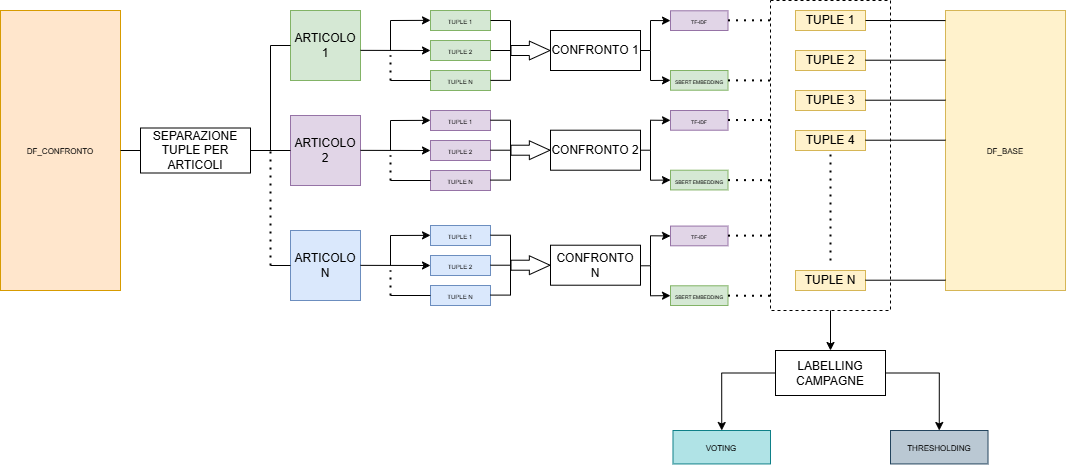

###VOTING - Similarità Lessicale (TF-IDF)

####Esecuzione

Contatori per campagne

In [ ]:
# Ottieni la lista delle campagne uniche in df_confronto
campagne = df_confronto['CAMPAGNA'].unique()

# Crea un dizionario di contatori inizializzati a 0
contatori_campagne = {campagna: 0 for campagna in campagne}

# Visualizza il dizionario per verificare
print(contatori_campagne)

{'American Action News': 0, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}


In [ ]:
# Ottieni l'elenco unico degli ID ARTICOLO
id_articoli_unici = df_confronto['ID ARTICOLO'].unique()

# Crea un dizionario per memorizzare i DataFrame dei diversi ID ARTICOLO
dataframes_articoli = {}

# Itera attraverso gli ID ARTICOLO unici
for id_articolo in id_articoli_unici:
    # Filtra il DataFrame per ottenere solo le righe di uno specifico ID ARTICOLO
    df_articolo = df_confronto[df_confronto['ID ARTICOLO'] == id_articolo]

    # Aggiungi il DataFrame al dizionario con l'ID ARTICOLO come chiave
    dataframes_articoli[id_articolo] = df_articolo

    # (Opzionale) Stampa l'ID ARTICOLO e il numero di righe nel DataFrame
    print(f"ID ARTICOLO: {id_articolo}, Numero di righe: {len(df_articolo)}")


ID ARTICOLO: 106, Numero di righe: 7
ID ARTICOLO: 85, Numero di righe: 8
ID ARTICOLO: 114, Numero di righe: 7
ID ARTICOLO: 94, Numero di righe: 10
ID ARTICOLO: 182, Numero di righe: 18
ID ARTICOLO: 90, Numero di righe: 21
ID ARTICOLO: 93, Numero di righe: 9
ID ARTICOLO: 119, Numero di righe: 7
ID ARTICOLO: 141, Numero di righe: 5
ID ARTICOLO: 68, Numero di righe: 11
ID ARTICOLO: 149, Numero di righe: 12
ID ARTICOLO: 117, Numero di righe: 6
ID ARTICOLO: 157, Numero di righe: 4
ID ARTICOLO: 89, Numero di righe: 7
ID ARTICOLO: 80, Numero di righe: 9
ID ARTICOLO: 96, Numero di righe: 19
ID ARTICOLO: 144, Numero di righe: 9
ID ARTICOLO: 183, Numero di righe: 7
ID ARTICOLO: 158, Numero di righe: 2
ID ARTICOLO: 128, Numero di righe: 3
ID ARTICOLO: 78, Numero di righe: 6
ID ARTICOLO: 138, Numero di righe: 8
ID ARTICOLO: 92, Numero di righe: 11
ID ARTICOLO: 168, Numero di righe: 10
ID ARTICOLO: 79, Numero di righe: 4
ID ARTICOLO: 161, Numero di righe: 8
ID ARTICOLO: 179, Numero di righe: 6
ID A

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()


# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1

# Lista per salvare le accuratezze
accuracies = []
# Itera su ogni threshold
for threshold in thresholds:
  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito
  for id_articolo in id_articoli_unici:
    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    # Estrai le tuple dalla colonna "TUPLA"
    tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
    tuples2 = df_base['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    threshold = threshold

    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= threshold:

          nomeCampagna= df_base['CAMPAGNA'].iloc[best_match_index]
          contatori_campagne[nomeCampagna]+=1

        # Debug: Stampa i dettagli della similarità e delle etichette
        # print(f"Tuple1: {tuples1[i]}")
        # print(f"Best Match: {tuples2[best_match_index]}")
        # print(f"Campagna del best match:", {df_base['CAMPAGNA'].iloc[best_match_index]})
        # print(f"Similarity Score: {best_match_score:.2f}")
        # print("")
    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max
    print("----------------FINE CAMPAGNA----------------")
# Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto[df_confronto['CAMPAGNA'] == df_confronto['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


{'American Action News': 6, 'Doctors found dead after cancer discovery': 1, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 8, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 7, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 9, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 1}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 12, 'Doctors found dead after cancer discovery': 1, 'Vaccines and illnesses fake ne

#####Misure di tempi

Singolo gruppo:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()

# Definisci i thresholds da testare
threshold = 0.1
id_articolo = 11815

# Resetta lo stato del dataframe ad ogni nuova iterazione
df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

# Resetta i contatori ad ogni nuova analisi di articolo nuovo
contatori_campagne = {campagna: 0 for campagna in campagne}

# Misura il tempo di inizio per l'intero processo
start_time_total = time.time()

# **1. Misurare il tempo di conversione delle tuple in TF-IDF**
start_time_conversion = time.time()

# Estrai le tuple dalla colonna "TUPLA"
tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
tuples2 = df_base_final['TUPLA'].tolist()

# Combine tutte le tuple in un'unica lista per il TF-IDF
all_tuples = tuples1 + tuples2

# Calcola la matrice TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_tuples)

# Fine misurazione tempo di conversione
end_time_conversion = time.time()

# Calcola la matrice di similarità coseno
similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

# Imposta la soglia di similarità
threshold = threshold

# **2. Misura il tempo di esecuzione per il matching**
start_time_matching = time.time()

for i, similarities in enumerate(similarity_matrix):
    best_match_index = similarities.argmax()
    best_match_score = similarities[best_match_index]
    if best_match_score >= threshold:
        nomeCampagna = df_base_final['CAMPAGNA'].iloc[best_match_index]
        contatori_campagne[nomeCampagna] += 1

end_time_matching = time.time()

# Calcola quale campagna ha il contatore più alto
campagna_max = max(contatori_campagne, key=contatori_campagne.get)
df_confronto_final.loc[df_confronto_final['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max

# Fine dell'intera esecuzione
end_time_total = time.time()

# **3. Calcolo throughput (tuple per secondo)**
# Numero totale di tuple processate
total_tuples_processed = len(tuples1)

# Tempo totale impiegato (escluso il tempo di conversione testuale)
total_execution_time = end_time_matching - start_time_matching

conversion_xtuple_time= (end_time_conversion - start_time_conversion) / total_tuples_processed

# Throughput: numero di tuple processate al secondo
throughput = total_tuples_processed / total_execution_time

# Stampa i risultati
print(f"Tempo di conversione TF-IDF: {end_time_conversion - start_time_conversion:.4f} secondi")
print(f"Tempo di conversione per ogni tupla: {conversion_xtuple_time:.4f} secondi")
print(f"Tempo di matching (esecuzione): {total_execution_time:.4f} secondi")
print(f"Throughput (tuple al secondo): {throughput:.2f} tuple/sec")
print(f"Tempo totale di esecuzione: {end_time_total - start_time_total:.4f} secondi")


Tempo di conversione TF-IDF: 0.1673 secondi
Tempo di conversione per ogni tupla: 0.0084 secondi
Tempo di matching (esecuzione): 0.0012 secondi
Throughput (tuple al secondo): 16790.65 tuple/sec
Tempo totale di esecuzione: 0.1760 secondi


Primi 10 gruppi:

In [ ]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

id_articoli_primi_10 = id_articoli_unici[:10]

# Definisci la soglia di similarità
threshold = 0.1

# Inizializza le variabili per il tempo e throughput
tempo_totale = 0
tempo_conversione_totale = 0
numero_totale_di_tuple = 0

# Itera attraverso i primi 10 ID ARTICOLO
for id_articolo in id_articoli_primi_10:

    # Misura il tempo di inizio per il gruppo
    start_time_gruppo = time.time()

    # Estrai le tuple per l'articolo corrente
    tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
    tuples2 = df_base_final['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Conta il numero di tuple elaborate
    numero_totale_di_tuple += len(all_tuples)

    # Misura il tempo di inizio per la conversione TF-IDF
    start_time_conversione = time.time()

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola il tempo impiegato per la conversione TF-IDF
    tempo_conversione = time.time() - start_time_conversione
    tempo_conversione_totale += tempo_conversione

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    contatori_campagne = {campagna: 0 for campagna in campagne}
    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= threshold:
            nomeCampagna = df_base_final['CAMPAGNA'].iloc[best_match_index]
            contatori_campagne[nomeCampagna] += 1

    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    df_confronto_final.loc[df_confronto_final['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max

    # Misura il tempo totale per il gruppo corrente
    tempo_totale_gruppo = time.time() - start_time_gruppo
    tempo_totale += tempo_totale_gruppo

# Calcola il throughput medio (tuple elaborate per secondo)
throughput_medio = numero_totale_di_tuple / tempo_totale

# Calcola il tempo medio di conversione TF-IDF per gruppo
tempo_conversione_medio = tempo_conversione_totale / len(id_articoli_primi_10)

# Stampa i risultati
print(f"Tempo totale di esecuzione per 10 gruppi: {tempo_totale:.4f} secondi")
print(f"Throughput medio: {throughput_medio:.4f} tuple per secondo")
print(f"Tempo medio di conversione TF-IDF per gruppo: {tempo_conversione_medio:.4f} secondi")


Tempo totale di esecuzione per 10 gruppi: 2.0015 secondi
Throughput medio: 28567.2872 tuple per secondo
Tempo medio di conversione TF-IDF per gruppo: 0.1894 secondi


Tempo tutto il test set

In [ ]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Definisci la soglia di similarità
threshold = 0.1

# Inizializza le variabili per il tempo e throughput
tempo_totale = 0
tempo_conversione_totale = 0
numero_totale_di_tuple = 0

# Itera attraverso
for id_articolo in id_articoli_unici:

    # Misura il tempo di inizio per il gruppo
    start_time_gruppo = time.time()

    # Estrai le tuple per l'articolo corrente
    tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
    tuples2 = df_base_final['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Conta il numero di tuple elaborate
    numero_totale_di_tuple += len(tuples1)

    # Misura il tempo di inizio per la conversione TF-IDF
    start_time_conversione = time.time()

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola il tempo impiegato per la conversione TF-IDF
    tempo_conversione = time.time() - start_time_conversione

    tempo_conversione_totale += tempo_conversione

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    contatori_campagne = {campagna: 0 for campagna in campagne}
    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= threshold:
            nomeCampagna = df_base_final['CAMPAGNA'].iloc[best_match_index]
            contatori_campagne[nomeCampagna] += 1

    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    df_confronto_final.loc[df_confronto_final['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max

    # Misura il tempo totale per il gruppo corrente
    tempo_totale_gruppo = time.time() - start_time_gruppo
    tempo_totale += tempo_totale_gruppo

# Calcola il throughput medio (tuple elaborate per secondo)
throughput_medio = numero_totale_di_tuple / tempo_totale

# Calcola il tempo medio di conversione TF-IDF per gruppo
tempo_conversione_medio = tempo_conversione_totale / len(id_articoli_unici)

# Stampa i risultati
print(f"Tempo totale di esecuzione per test set: {tempo_totale:.4f} secondi")
print(f"Throughput medio: {throughput_medio:.4f} tuple per secondo")
print(f"Tempo medio di conversione TF-IDF per gruppo: {tempo_conversione_medio:.4f} secondi")

Tempo totale di esecuzione per 10 gruppi: 26.7831 secondi
Throughput medio: 115.2966 tuple per secondo
Tempo medio di conversione TF-IDF per gruppo: 0.0940 secondi


####Risultati

In [ ]:
print(accuracies)

[(0.1, 0.8727272727272727), (0.15, 0.9090909090909091), (0.2, 0.9636363636363636), (0.25, 0.8909090909090909), (0.3, 0.8909090909090909), (0.35, 0.8181818181818182), (0.4, 0.8), (0.45, 0.7818181818181819), (0.5, 0.7636363636363637), (0.55, 0.7454545454545455), (0.6, 0.7272727272727273), (0.65, 0.7272727272727273), (0.7, 0.7090909090909091), (0.75, 0.6909090909090909), (0.8, 0.6727272727272727), (0.85, 0.6545454545454545), (0.9, 0.6545454545454545), (0.95, 0.6545454545454545)]


In [ ]:
#accuracies= [(0.1, 0.8727272727272727), (0.15, 0.9090909090909091), (0.2, 0.9636363636363636), (0.25, 0.8909090909090909), (0.3, 0.8909090909090909), (0.35, 0.8181818181818182), (0.4, 0.8), (0.45, 0.7818181818181819), (0.5, 0.7636363636363637), (0.55, 0.7454545454545455), (0.6, 0.7272727272727273), (0.65, 0.7272727272727273), (0.7, 0.7090909090909091), (0.75, 0.6909090909090909), (0.8, 0.6727272727272727), (0.85, 0.6545454545454545), (0.9, 0.6545454545454545), (0.95, 0.6545454545454545)]

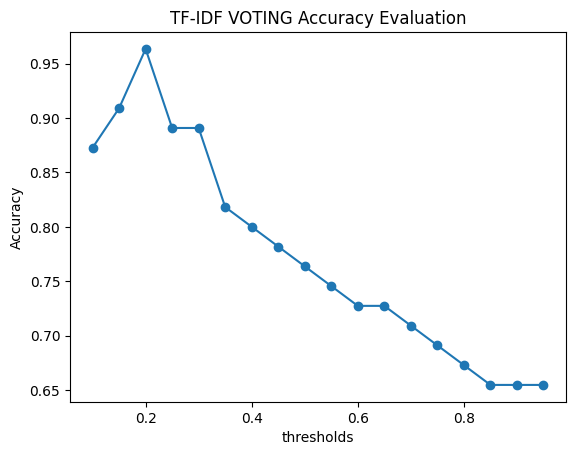

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds')
plt.ylabel('Accuracy')
plt.title('TF-IDF VOTING Accuracy Evaluation')
plt.show()


In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold di: ", thresholds[accuracy_values.index(max(accuracy_values))])

La massima accuratezza raggiunta è: 0.9636363636363636 per un threshold di:  0.2


###THRESHOLDING - Similarità Lessicale (TF-IDF)

L'assegnazione dei threshold per campagna è stata effettuata con un approccio empirico.
E' stato settato il threshold per campagna come NumeroArticoliCampagna * threshold (i) in diverse iterazioni.
Il threshold di similarità per contare le tuple simili invece, è stato mantenuto fisso a 0.1.

In [ ]:
# Raggruppa per la colonna 'CAMPAGNA' e conta il numero di righe per ciascuna campagna
conteggio_per_campagna = df_base.groupby('CAMPAGNA').size()

# Visualizza il risultato
print(conteggio_per_campagna)


CAMPAGNA
American Action News                         726
Doctors found dead after cancer discovery    381
Vaccines and illnesses fake news             253
dtype: int64


####Esecuzione

In [ ]:
# Ottieni l'elenco unico degli ID ARTICOLO
id_articoli_unici = df_confronto['ID ARTICOLO'].unique()

# Crea un dizionario per memorizzare i DataFrame dei diversi ID ARTICOLO
dataframes_articoli = {}

# Itera attraverso gli ID ARTICOLO unici
for id_articolo in id_articoli_unici:
    # Filtra il DataFrame per ottenere solo le righe di uno specifico ID ARTICOLO
    df_articolo = df_confronto[df_confronto['ID ARTICOLO'] == id_articolo]

    # Aggiungi il DataFrame al dizionario con l'ID ARTICOLO come chiave
    dataframes_articoli[id_articolo] = df_articolo

    # (Opzionale) Stampa l'ID ARTICOLO e il numero di righe nel DataFrame
    #print(f"ID ARTICOLO: {id_articolo}, Numero di righe: {len(df_articolo)}")


In [ ]:
# Funzione per aggiungere una tripla al dizionario
def aggiungi_tripla(campagna, contatore, threshold):
    triple_campagne[campagna] = (contatore, threshold, campagna)

In [ ]:
# Funzione per estrarre la tripla desiderata
def estrai_tripla_con_max_contatore(triple_campagne):
    if len(triple_campagne) == 1:
        # Se c'è solo una tripla, estrai e restituisci quella
        return list(triple_campagne.values())[0]
    elif len(triple_campagne) >= 2:
        # Se ci sono più di 2 triple, trova quella con il contatore maggiore
        return max(triple_campagne.values(), key=lambda x: x[0])
    else:
        return None  # Nel caso ci siano 0 o 2 triple, non fare nulla o gestisci diversamente

In [ ]:
# # Ottieni la lista delle campagne uniche in df_base_final
# campagne = df_base_final['CAMPAGNA'].unique()

# # Definisci i thresholds da testare
# thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1
# for threshold in thresholds:
#   # Crea un dizionario con i threshold calcolati per ogni campagna
#   threshold_campagne = {campagna: conteggio * threshold for campagna, conteggio in conteggio_per_campagna.items()}

#   # # Visualizza il dizionario per verificare
#   # print(threshold_campagne)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

# Lista per salvare le accuratezze
accuracies = []

# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1
for threshold in thresholds:
  # Crea un dizionario con i threshold calcolati per ogni campagna
  threshold_campagne = {campagna: conteggio * threshold for campagna, conteggio in conteggio_per_campagna.items()}

  # Definisci il threshold di similarità
  similarity_threshold= 0.1

  df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito
  for id_articolo in id_articoli_unici:

    # Crea un dizionario vuoto per le triple
    triple_campagne = {}

    contatori_campagne = {campagna: 0 for campagna in campagne}
    # Estrai le tuple dalla colonna "TUPLA"
    tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
    tuples2 = df_base['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    similarity_threshold = similarity_threshold

    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= similarity_threshold:
          nomeCampagna= df_base['CAMPAGNA'].iloc[best_match_index]
          contatori_campagne[nomeCampagna]+=1

        # Debug: Stampa i dettagli della similarità e delle etichette
        # print(f"Tuple1: {tuples1[i]}")
        # print(f"Best Match: {tuples2[best_match_index]}")
        # print(f"Campagna del best match:", {df_base['CAMPAGNA'].iloc[best_match_index]})
        # print(f"Similarity Score: {best_match_score:.2f}")
        # print("")
    print(contatori_campagne)
    print(threshold_campagne)

    for campagnas in contatori_campagne:
      contatore = contatori_campagne[campagnas]
      thresholdes = threshold_campagne[campagnas]

      if contatore >= thresholdes:
        aggiungi_tripla(campagnas, contatore, threshold)

    print(triple_campagne)
    tripla=estrai_tripla_con_max_contatore(triple_campagne)
    print(tripla)
    if tripla != None:
      print(f"La campagna assegnata è: {tripla[2]}")
      df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = tripla[2]
    print("----------------FINE CAMPAGNA----------------")
  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto[df_confronto['CAMPAGNA'] == df_confronto['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot
  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


{'American Action News': 6, 'Doctors found dead after cancer discovery': 1, 'Vaccines and illnesses fake news': 0}
{'American Action News': 72.60000000000001, 'Doctors found dead after cancer discovery': 38.1, 'Vaccines and illnesses fake news': 25.3}
{}
None
----------------FINE CAMPAGNA----------------
{'American Action News': 8, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
{'American Action News': 72.60000000000001, 'Doctors found dead after cancer discovery': 38.1, 'Vaccines and illnesses fake news': 25.3}
{}
None
----------------FINE CAMPAGNA----------------
{'American Action News': 7, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
{'American Action News': 72.60000000000001, 'Doctors found dead after cancer discovery': 38.1, 'Vaccines and illnesses fake news': 25.3}
{}
None
----------------FINE CAMPAGNA----------------
{'American Action News': 9, 'Doctors found dead after cancer discovery': 0, 'Vacci

####Risultati

In [ ]:
# print(f"Accuratezza:", accuracy)
# df_confronto_final.to_excel('Classificazione_THRESHOLDING.xlsx', index=False)

In [ ]:
print(accuracies)

[(0.1, 0.0), (0.15, 0.0), (0.2, 0.0), (0.25, 0.0), (0.3, 0.0), (0.35, 0.0), (0.4, 0.0), (0.45, 0.0), (0.5, 0.0), (0.55, 0.0), (0.6, 0.0), (0.65, 0.0), (0.7, 0.0), (0.75, 0.0), (0.8, 0.0), (0.85, 0.0), (0.9, 0.0), (0.95, 0.0)]


In [ ]:
#accuracies= [(0.1, 0.07749077490774908), (0.15, 0.05904059040590406), (0.2, 0.04797047970479705), (0.25, 0.04059040590405904), (0.3, 0.02952029520295203), (0.35, 0.025830258302583026), (0.4, 0.025830258302583026), (0.45, 0.02214022140221402), (0.5, 0.01845018450184502), (0.55, 0.007380073800738007), (0.6, 0.0), (0.65, 0.0), (0.7, 0.0), (0.75, 0.0), (0.8, 0.0), (0.85, 0.0), (0.9, 0.0), (0.95, 0.0)]

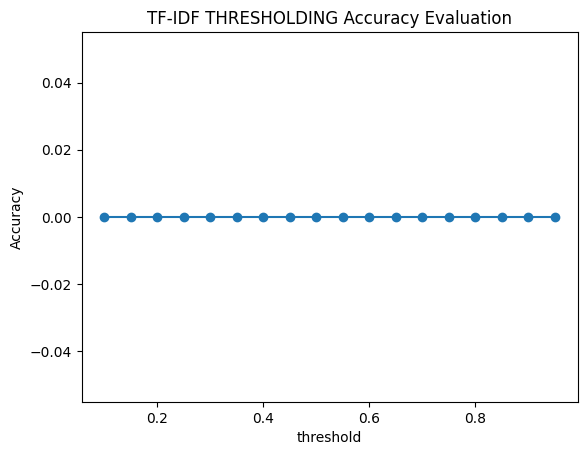

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.title('TF-IDF THRESHOLDING Accuracy Evaluation')
plt.show()


In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold per campagna di: ", thresholds[accuracy_values.index(max(accuracy_values))])

La massima accuratezza raggiunta è: 0.07749077490774908 per un threshold per campagna di:  0.1


###VOTING - Similarità Semantica (SBERT)

####Installazione

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 14.0 MB/s eta 0:00:00


####Esecuzione

#####Embeddings del dataframe BASE

In [ ]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# # Sample sentences
df1 = df_base['TUPLA'].tolist()

# Embedding di tutte le frasi di df base.
embeddings_df_base = model.encode(df1)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#####Separazione tuple x articolo e Embeddings

In [ ]:
# Ottieni la lista delle campagne uniche in df_confronto_final
campagne = df_confronto['CAMPAGNA'].unique()

# Crea un dizionario di contatori inizializzati a 0
contatori_campagne = {campagna: 0 for campagna in campagne}

# Visualizza il dizionario per verificare
print(contatori_campagne)

{'American Action News': 0, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}


In [ ]:
import time  # Importa il modulo per la misurazione del tempo

# Ottieni l'elenco unico degli ID ARTICOLO
id_articoli_unici = df_confronto['ID ARTICOLO'].unique()

# Crea un dizionario per memorizzare i DataFrame dei diversi ID ARTICOLO
dataframes_articoli = {}
embeddings_df_articoli = {}

# Variabile per tenere traccia del tempo totale di conversione
tempo_totale_conversione = 0
num_gruppi = len(id_articoli_unici)  # Numero totale di gruppi (ID ARTICOLO unici)

# Itera attraverso gli ID ARTICOLO unici
for id_articolo in id_articoli_unici:

    # Filtra il DataFrame per ottenere solo le righe di uno specifico ID ARTICOLO
    df_articolo = df_confronto[df_confronto['ID ARTICOLO'] == id_articolo]

    # Aggiungi il DataFrame al dizionario con l'ID ARTICOLO come chiave
    dataframes_articoli[id_articolo] = df_articolo

    # Inizia la misurazione del tempo per la conversione in embeddings
    start_time = time.time()

    # Converti le tuple in embeddings
    embeddings_df_articoli[id_articolo] = model.encode(df_articolo['TUPLA'].tolist())

    # Misura il tempo impiegato per la conversione
    tempo_conversione = time.time() - start_time
    tempo_totale_conversione += tempo_conversione

    # (Opzionale) Stampa l'ID ARTICOLO, il numero di righe e il tempo impiegato
    print(f"ID ARTICOLO: {id_articolo}, Numero di righe: {len(df_articolo)}, Tempo di conversione: {tempo_conversione:.4f} secondi")

# Calcola il tempo medio di conversione per gruppo
tempo_medio_per_gruppo = tempo_totale_conversione / num_gruppi

# Stampa il tempo totale impiegato per la conversione di tutti gli articoli e il tempo medio per gruppo
print(f"Tempo totale di conversione in embeddings: {tempo_totale_conversione:.4f} secondi")
print(f"Tempo medio di conversione per gruppo: {tempo_medio_per_gruppo:.4f} secondi")



ID ARTICOLO: 106, Numero di righe: 7, Tempo di conversione: 0.1736 secondi
ID ARTICOLO: 85, Numero di righe: 8, Tempo di conversione: 0.1789 secondi
ID ARTICOLO: 114, Numero di righe: 7, Tempo di conversione: 0.0930 secondi
ID ARTICOLO: 94, Numero di righe: 10, Tempo di conversione: 0.1041 secondi
ID ARTICOLO: 182, Numero di righe: 18, Tempo di conversione: 0.1974 secondi
ID ARTICOLO: 90, Numero di righe: 21, Tempo di conversione: 0.5341 secondi
ID ARTICOLO: 93, Numero di righe: 9, Tempo di conversione: 0.3339 secondi
ID ARTICOLO: 119, Numero di righe: 7, Tempo di conversione: 0.0695 secondi
ID ARTICOLO: 141, Numero di righe: 5, Tempo di conversione: 0.0578 secondi
ID ARTICOLO: 68, Numero di righe: 11, Tempo di conversione: 0.1432 secondi
ID ARTICOLO: 149, Numero di righe: 12, Tempo di conversione: 0.1086 secondi
ID ARTICOLO: 117, Numero di righe: 6, Tempo di conversione: 0.0407 secondi
ID ARTICOLO: 157, Numero di righe: 4, Tempo di conversione: 0.0378 secondi
ID ARTICOLO: 89, Numero d

#####Run Iterato

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(50, 70, 5)]  # Esempio: da 0.5 a 0.65 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

# Lista per salvare le accuratezze
accuracies = []

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for id_articolo in id_articoli_unici:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_articolo_attuale = dataframes_articoli[id_articolo]

    print(f"\nProcessing ID ARTICOLO: {id_articolo}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli[id_articolo]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_articolo_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto[df_confronto['CAMPAGNA'] == df_confronto['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")



Processing ID ARTICOLO: 106
{'American Action News': 3, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 85
{'American Action News': 165, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 114
{'American Action News': 88, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 94
{'American Action News': 44, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 1}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 182
{'American Action News': 39, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore 

In [ ]:
print(accuracies)

[(0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545)]


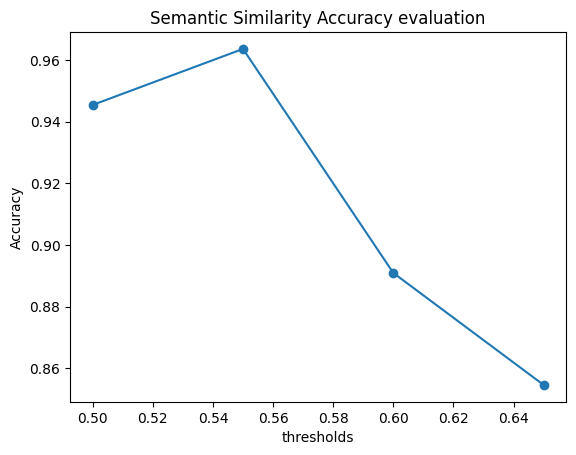

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds')
plt.ylabel('Accuracy')
plt.title('Semantic Similarity Accuracy evaluation')
plt.show()

In [ ]:
#accuracies = [(0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545)]

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 50, 5)]  # Esempio: da 0.1 a 0.45 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for id_articolo in id_articoli_unici:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_articolo_attuale = dataframes_articoli[id_articolo]

    print(f"\nProcessing ID ARTICOLO: {id_articolo}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli[id_articolo]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_articolo_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto[df_confronto['CAMPAGNA'] == df_confronto['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")



Processing ID ARTICOLO: 106
{'American Action News': 3633, 'Doctors found dead after cancer discovery': 1987, 'Vaccines and illnesses fake news': 375}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 85
{'American Action News': 4560, 'Doctors found dead after cancer discovery': 1107, 'Vaccines and illnesses fake news': 536}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 114
{'American Action News': 4133, 'Doctors found dead after cancer discovery': 1189, 'Vaccines and illnesses fake news': 475}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 94
{'American Action News': 5300, 'Doctors found dead after cancer discovery': 1680, 'Vaccines and illnesses fake news': 951}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 182
{'American Action News': 10022, 'Doctors found dead after cancer discovery': 2674, 'Vaccines and illnesses fake news'

In [ ]:
# Ordina la lista per il primo valore di ogni tupla
accuracies_ordinate = sorted(accuracies, key=lambda x: x[0])
# Visualizza la lista ordinata
print(accuracies_ordinate)

[(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545)]


In [ ]:
#accuracies_ordinate = [(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545)]

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(70, 100, 5)]  # Esempio: da 0.70 a 0.95 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for id_articolo in id_articoli_unici:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_articolo_attuale = dataframes_articoli[id_articolo]

    print(f"\nProcessing ID ARTICOLO: {id_articolo}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli[id_articolo]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_articolo_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto[df_confronto['CAMPAGNA'] == df_confronto['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


Processing ID ARTICOLO: 106
{'American Action News': 0, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 85
{'American Action News': 14, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 114
{'American Action News': 2, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 94
{'American Action News': 13, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News

Processing ID ARTICOLO: 182
{'American Action News': 0, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più

In [ ]:
# Ordina la lista per il primo valore di ogni tupla
accuracies_ordinate = sorted(accuracies, key=lambda x: x[0])
# Visualizza la lista ordinata
print(accuracies_ordinate)

[(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545), (0.7, 0.8363636363636363), (0.7, 0.8363636363636363), (0.75, 0.7818181818181819), (0.75, 0.7818181818181819), (0.8, 0.7454545454545455), (0.8, 0.7454545454545455), (0.85, 0.7272727272727273), (0.85, 0.7272727272727273), (0.9, 0.6909090909090909), (0.95, 0.6545454545454545)]


In [ ]:
#accuracies_ordinate = [(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545)]

####Risultati

In [ ]:
# Ordina la lista per il primo valore di ogni tupla
accuracies_ordinate = sorted(accuracies, key=lambda x: x[0])

# Visualizza la lista ordinata
print(accuracies_ordinate)

[(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545), (0.7, 0.8363636363636363), (0.7, 0.8363636363636363), (0.75, 0.7818181818181819), (0.75, 0.7818181818181819), (0.8, 0.7454545454545455), (0.8, 0.7454545454545455), (0.85, 0.7272727272727273), (0.85, 0.7272727272727273), (0.9, 0.6909090909090909), (0.95, 0.6545454545454545)]


In [ ]:
#accuracies_ordinate = [(0.1, 0.7636363636363637), (0.15, 0.8727272727272727), (0.2, 0.9090909090909091), (0.25, 0.9272727272727272), (0.3, 0.9272727272727272), (0.35, 0.9272727272727272), (0.4, 0.9454545454545454), (0.45, 0.9272727272727272), (0.5, 0.9454545454545454), (0.55, 0.9636363636363636), (0.6, 0.8909090909090909), (0.65, 0.8545454545454545), (0.7, 0.8363636363636363), (0.7, 0.8363636363636363), (0.75, 0.7818181818181819), (0.75, 0.7818181818181819), (0.8, 0.7454545454545455), (0.8, 0.7454545454545455), (0.85, 0.7272727272727273), (0.85, 0.7272727272727273), (0.9, 0.6909090909090909), (0.95, 0.6545454545454545)]

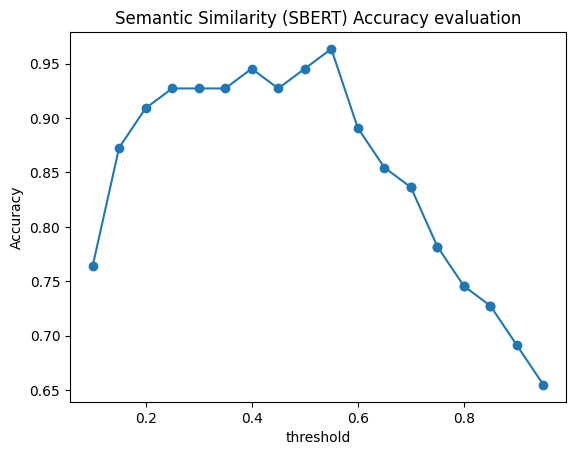

In [ ]:
# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies_ordinate)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.title('Semantic Similarity (SBERT) Accuracy evaluation')
plt.show()

In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold di: ", thresholds[accuracy_values.index(max(accuracy_values))])

La massima accuratezza raggiunta è: 0.9636363636363636 per un threshold di:  0.55


###Salvataggio file dei migliori threshold

####TF-IDF VOTING

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

# Definisci i thresholds da testare
threshold= 0.2

#Resetta lo stato del dataframe ad ogni nuova iterazione
df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito
for id_articolo in id_articoli_unici:
  #Resetta i contatori ad ogni nuova analisi di articolo nuovo
  contatori_campagne = {campagna: 0 for campagna in campagne}

  # Estrai le tuple dalla colonna "TUPLA"
  tuples1 = dataframes_articoli[id_articolo]['TUPLA'].tolist()
  tuples2 = df_base['TUPLA'].tolist()

  # Combine tutte le tuple in un'unica lista per il TF-IDF
  all_tuples = tuples1 + tuples2

  # Calcola la matrice TF-IDF
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(all_tuples)

  # Calcola la matrice di similarità coseno
  similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

  # Imposta la soglia di similarità
  threshold = threshold

  for i, similarities in enumerate(similarity_matrix):
      best_match_index = similarities.argmax()
      best_match_score = similarities[best_match_index]
      if best_match_score >= threshold:

        nomeCampagna= df_base['CAMPAGNA'].iloc[best_match_index]
        contatori_campagne[nomeCampagna]+=1

      # Debug: Stampa i dettagli della similarità e delle etichette
      # print(f"Tuple1: {tuples1[i]}")
      # print(f"Best Match: {tuples2[best_match_index]}")
      # print(f"Campagna del best match:", {df_base['CAMPAGNA'].iloc[best_match_index]})
      # print(f"Similarity Score: {best_match_score:.2f}")
      # print("")
  print(contatori_campagne)
  campagna_max = max(contatori_campagne, key=contatori_campagne.get)
  print(f"La campagna con il contatore più alto è: {campagna_max}")
  df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max
  print("----------------FINE CAMPAGNA----------------")

df_confronto.to_excel('TF-IDF_Voting_Labelled.xlsx', index=False)

{'American Action News': 5, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 7, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 7, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 0}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 8, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake news': 1}
La campagna con il contatore più alto è: American Action News
----------------FINE CAMPAGNA----------------
{'American Action News': 8, 'Doctors found dead after cancer discovery': 0, 'Vaccines and illnesses fake new

####SBERT VOTING

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
threshold= 0.55

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto['ID ARTICOLO'].nunique()

#Resetta lo stato del dataframe ad ogni nuova iterazione
df_confronto['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

for id_articolo in id_articoli_unici:

  #Resetta i contatori ad ogni nuova analisi di articolo nuovo
  contatori_campagne = {campagna: 0 for campagna in campagne}

  df_articolo_attuale = dataframes_articoli[id_articolo]

  print(f"\nProcessing ID ARTICOLO: {id_articolo}")

  # Itera attraverso gli embeddings del sotto-DataFrame corrente
  for i, vec_confronto in enumerate(embeddings_df_articoli[id_articolo]):
      # Ottieni la frase originale dal sotto-DataFrame
      tupla_confronto = df_articolo_attuale['TUPLA'].iloc[i]
      #print(f'\nTest sentence {i}:', tupla_confronto)

      # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
      for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

          # Calcola la similarità
          similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

          # Ottieni la frase originale in df_base corrispondente
          #tupla_base = df_base['TUPLA'].iloc[j]
          # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
          # print(f"Campagna della tupla", df_base['CAMPAGNA'].iloc[j])

          # Aggiorna il contatore della campagna corrispondente
          if similarity_score >= threshold:
              contatori_campagne[df_base['CAMPAGNA'].iloc[j]] += 1

  print(contatori_campagne)
  campagna_max = max(contatori_campagne, key=contatori_campagne.get)
  print(f"La campagna con il contatore più alto è: {campagna_max}")
  df_confronto.loc[df_confronto['ID ARTICOLO'] == id_articolo, 'Campagna Assegnata'] = campagna_max

df_confronto.to_excel('SBERT_Voting_Labelled.xlsx', index=False)